In [1]:
%matplotlib notebook
import numpy as np
import sigpy as sp
import sigpy.mri as mr
import sigpy.plot as pl

<IPython.core.display.Javascript object>


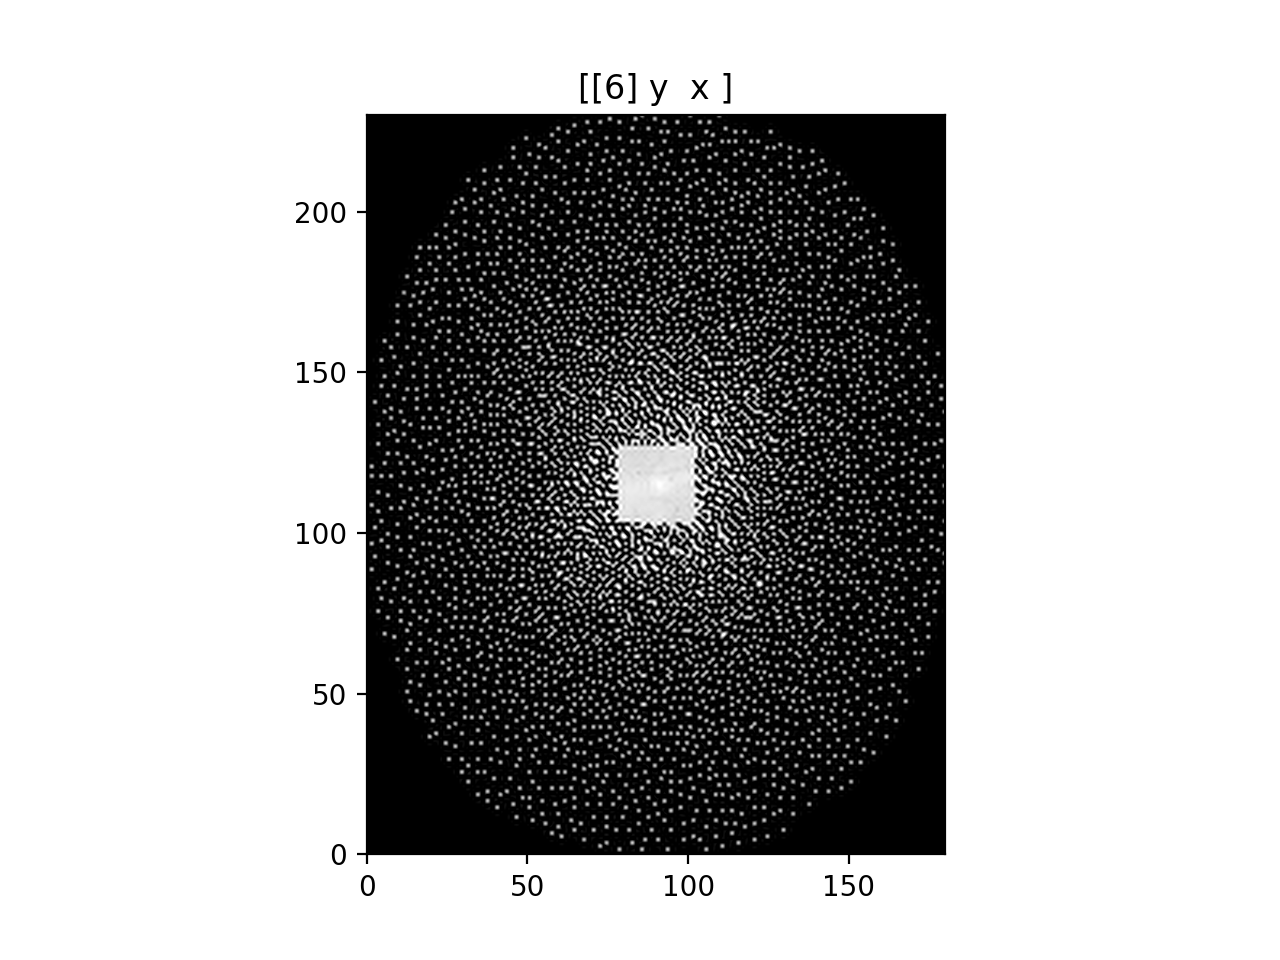

In [7]:
ksp = np.load('data/brain_ksp.npy')
ksp /= np.abs(sp.ifft(ksp, axes=[-1, -2])).max()

pl.ImagePlot(ksp)

# JSENSE Recon

JsenseRecon: 100%|██████████| 10/10 [00:01<00:00,  7.36it/s].84it/s, resid=1.56E-02]


<IPython.core.display.Javascript object>


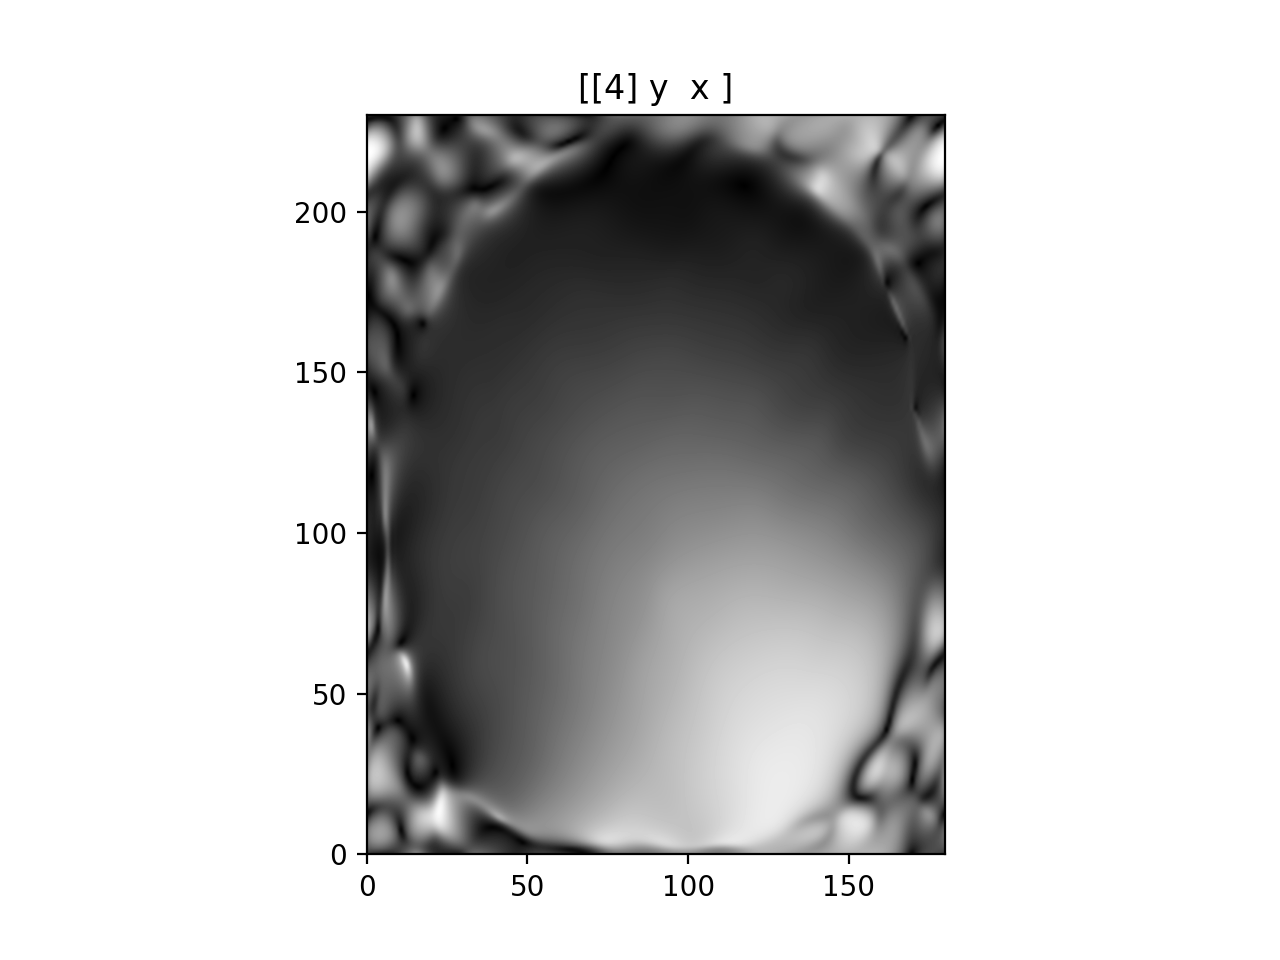

In [6]:
mps = mr.app.JsenseRecon(ksp).run()

pl.ImagePlot(mps)

## SENSE Recon

In [8]:
img = mr.app.SenseRecon(ksp, mps, lamda=0.01).run()

SenseRecon: 100%|██████████| 100/100 [00:06<00:00, 13.85it/s, resid=2.52E-09]


<IPython.core.display.Javascript object>


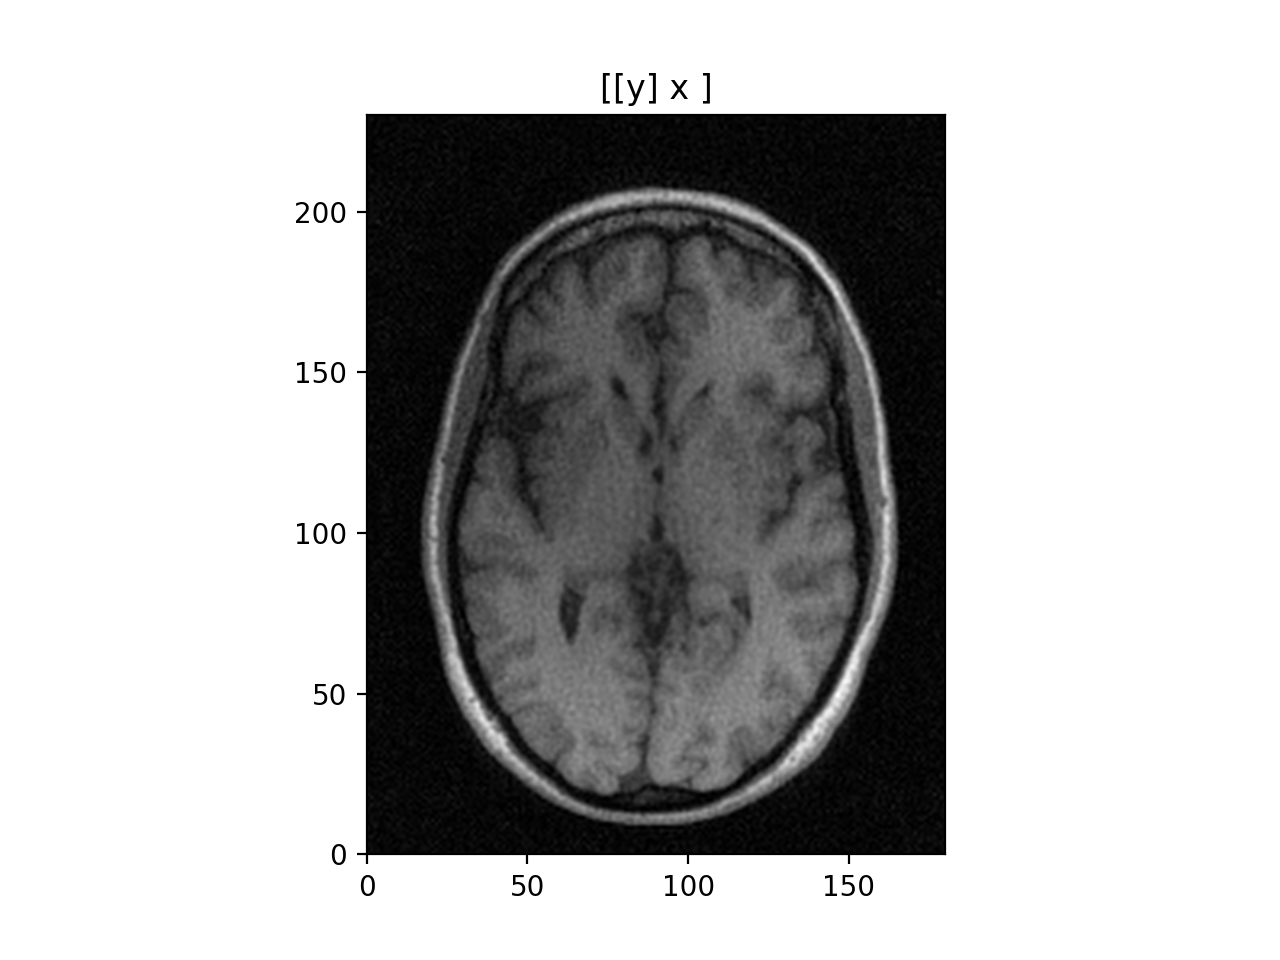

In [9]:
pl.ImagePlot(img)

## L1 Wavelet Recon

In [4]:
img = mr.app.L1WaveletRecon(ksp, mps, lamda=0.005).run()

L1WaveletRecon: 100%|██████████| 100/100 [00:07<00:00, 12.69it/s, resid=2.41E-03]


<IPython.core.display.Javascript object>


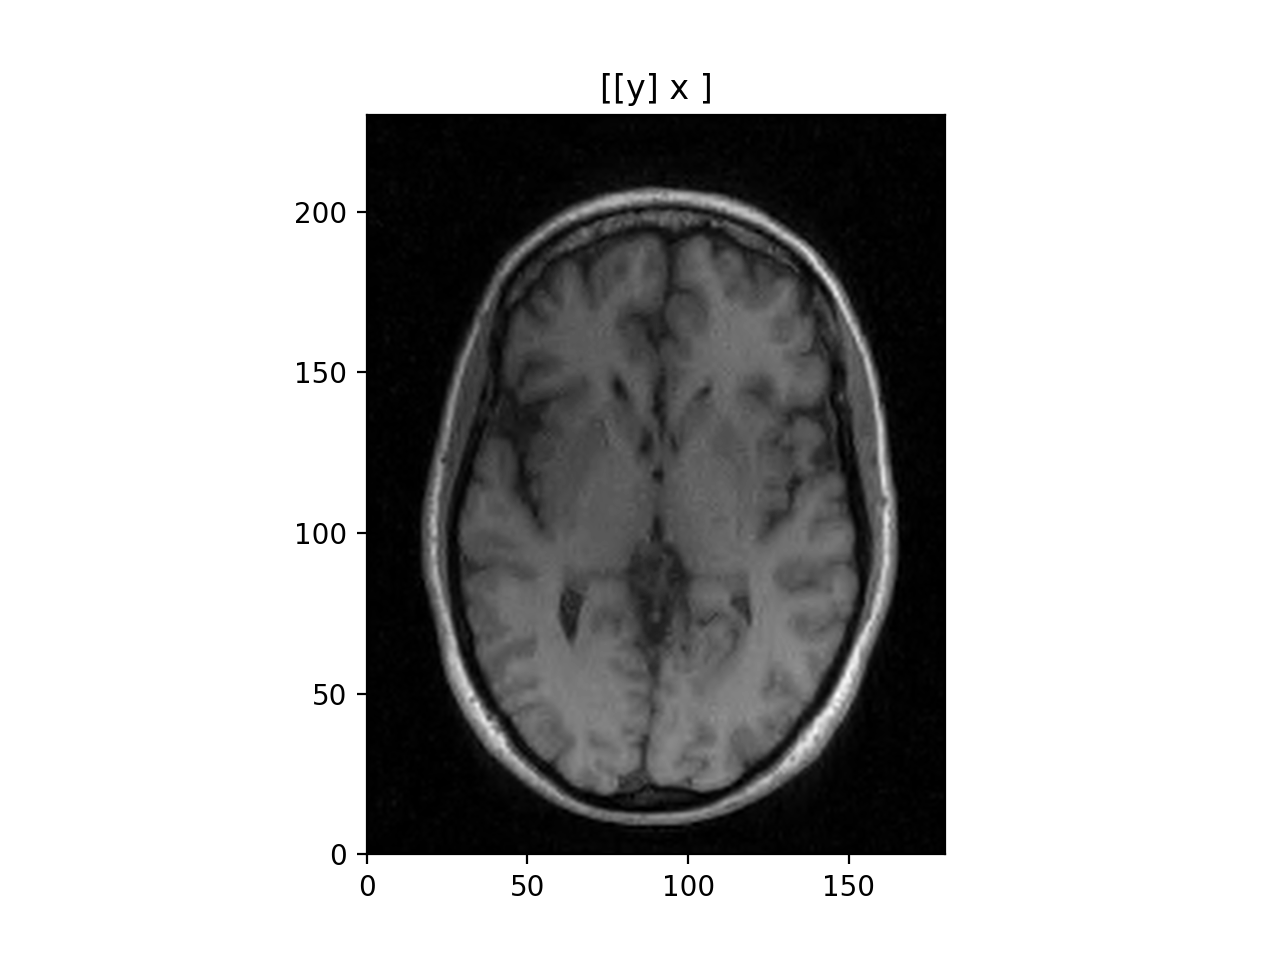

In [5]:
pl.ImagePlot(img)